# Classification with the artificial neuron using Intel® Python

In this section, we will build a artificial neuron using Intel® Python. The principal idea is to train a single-layer neural network model to correctly data classify.

## Objectives

* **Understand** the concept of single-layer neural network using the artificial neuron model,
* **Learn** about the artificial neuron algorithm,
* **Create** a simple artificial neuron neural network to classify data,
* **Train** the artificial neuron neural network,
* **Observe** the performance of the trained artificial neuron neural network.

## The problem: classification data

<p style='text-align: justify;'> 
Classification problems require the given data set to be classified into two or more categories. A simple example is classifying an email message as spam or not spam. Or, given an image of a flower, classify which kind of flower it is. There are different kinds of classifiers:
</p>  

- A binary classifier classifies data into exactly two classes: yes/no, good/bad, or high/low,

- A non-binary classifier can classify data into three or more categories.

## The solution: artificial neuron

<p style='text-align: justify;'> 
A artificial neuron is an algorithm that imitates how a neuron in the brain works. It is a type of single-layer neural network consisting of a single neuron. The output of this neural network is decided based on the outcome of just one activation function associated with the single neuron. In a artificial neuron, information propagates forward through the network. A deep neural network consists of one or more artificial neurons in two or more layers. Input to different artificial neurons in a particular layer will be fed from the previous layer by combining them with different weights. 
</p>     

<p style='text-align: justify;'> 
Before studying a artificial neuron, we must understand how a human neuron works. The <b>dendrites</b> are the entrances to the neuron. They receive electrical signals from other neurons and send them to the cell body.
</p> 

<p style='text-align: justify;'> 
Inside the <b>cell body</b>, information processing is carried out through the <b>sum</b> of the inputs that the neuron receives. This set of added electrical stimuli causes the cell nucleus of the neuron to send the result of the sum of the information it received to a structure called an <b>axon</b>, which consequently sends these electrical signals to the <b>axon terminals</b>, thus producing an output stimulus.
</p> 
       
     
     
<p style="text-align: center;">
 <img src="images/figure1_humanNeuron.png"  width="500" height="500">
</p>

<p style='text-align: justify;'>
In an artificial neural network, the logic is quite similar. First, the network receives different signals at its inputs, which are represented by ($X_1$, $X_2$, ... $X_n$). 
</p>

<p style='text-align: justify;'>
From there, the input signals pass through weights ($W_1$, $W_2$, ... $W_n$) which are nothing more than multipliers that control the influence of each of the inputs of the neural network. Initially, these weights are randomly generated. However, as we will see in the following modules, the weights are adjusted by training the network. After the neural network multiplies the inputs $X$ by the weights $W$, a sum of all results is performed according to the following formula:
</p>
    
$$
y = \sum_{i = 0}^{n} (W_i*X_i)
$$
<br>
<br>
    
Once the sum is performed, the result is then sent to a function called sigmoid, which has the function of activating or not activating the network output: 
</p>

<br>

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

<br>
<br>

<p style='text-align: justify;'>
    The following is a complete representation of the structure of a artificial neuron:
</p>

<p style="text-align: center;">
 <img src="images/figure2_artificial_neuron.jpg"  width="500" height="500">
</p>

## Implementing the artificial neuron with Intel® Python

Now that we have studied the artificial neuron algorithm, let us implement the actual algorithm with Intel® Python. Create a code that will store our artificial neuron implementation for a generic problem:

#### ⊗ Import Python packages 
The first thing we need to do is import the necessary libraries to be able to implement our artificial neuron neural network.

In [1]:
# Python Packages
import numpy as np
import matplotlib.pyplot as plt
import random
import math

#### ⊗ Define the inputs

<p style='text-align: justify;'>
In this first example, we will define two inputs ($X_1$, $X_2$) with fixed values to simplify the neural network. However, in real applications, the neuron may use many inputs in order to represent diverse input information.
<p/>

In [2]:
# Inputs
X = [1, 0]

#### ⊗ Generate weights

<p style='text-align: justify;'>
Here we will generate the weights to compose our neural network. We will initially generate random weights in this example, but it is important to note that these weights will be updated when the network is trained. The weight training itself will be covered in a later module.
</p>

<p style='text-align: justify;'>
This code snippet generates two weights ($W_1$, $W_2$), and then a loop uses the random function to generate random values between $-1$ and $1$.
</p>

In [3]:
# Creating the artificial neuron weights
W = []
nInputs = 2

for i in range(nInputs):
    W.append(random.uniform(-1, 1))
print("Weights:")
print(W)

Weights:
[-0.38280772650744765, 0.6989784253573594]


#### ⊗ Calculate the sum of the network

<p style='text-align: justify;'>
In this step, the algorithm will multiply the inputs by the weights, adding the result of this multiplication, thus resulting in an output value of the network.
</p>

$$
y = (X_1 * W_1) + (X_2 * W_2)
$$

In [4]:
# Calculating sum of the network
y_sum = 0
for i in range(len(W)):
    y_sum =  y_sum + (W[i] * X[i])  
print(y_sum)

-0.38280772650744765


#### ⊗ Activation function (*sigmoid*)

<p style='text-align: justify;'>
Constraining the outputs is essential to ensure that the neural network generates results on a suitable scale for most scenarios. The sigmoid function is employed in neural networks due to its ability to map outputs within the range of 0 to 1, making it particularly advantageous for classification tasks. This implies that it's more beneficial for computational processing to handle compact values between 0 and 1, avoiding overly large numbers. Such consideration is critical as, depending on the data volume, memory capacity or other computational resources might be constrained when dealing with high values.
</p>
<p style='text-align: justify;'>
Another crucial attribute is its differentiability, which plays a vital role in network training. The differentiability of the function is an indispensable requirement for adjusting the network's weights during the training process, enabling the network to learn from data and improve over time.
</p>

In [5]:
# Activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

<p style='text-align: justify;'>
Plotting a graph is one way to understand how the sigmoid function works. We can see that the sigmoid function is not linear and that it varies from $0$ to its maximum value of $1$. 
</p>    
    
<p style='text-align: justify;'>  
This characteristic is used to decide if the neural network's output will be activated. If the output value is close to $0$, the network output is not activated. If the output approaches $1$, it will be activated.
</p>

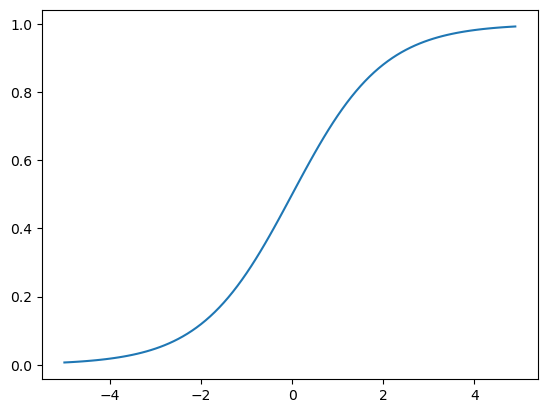

In [6]:
plt.plot(np.arange(-5,5,0.1), [sigmoid(x) for x in np.arange(-5,5,0.1)])
plt.show()

#### ⊗ Output from the network

<p style='text-align: justify;'>
At this point we create a function called activated where the value generated through the result of the sum of the network values ​​passing through the sigmoid function will be stored, thus generating a final activation value.
</p>

In [7]:
# Use the sigmoid function
activated = sigmoid(y_sum)
print(activated)

0.40544988645712743


<p style='text-align: justify;'>
The activated function will show the network output value, which must be within a range between 0 and 1. The closer the values are to the limits of 0 and 1, the more likely it is that the input data and weights converged to a desired result.
</p>

#### ⊗ Threshold

<p style='text-align: justify;'>
The term "thresholded" refers to a decision-making technique in a model, where an input or output value is compared with a specific threshold to determine the appropriate category or state. This is often used to convert a continuous output into a binary decision.
</p>
<p style='text-align: justify;'>
In the context of a sigmoid function in a perceptron (a type of artificial neuron), after calculating the sigmoid function's output, it can be utilized to make a binary decision. The sigmoid function's output falls within the range of 0 to 1, representing the probability of belonging to a class (for example, the probability of being a rose). To transform this probability into a final decision, a specific value can be applied, usually around 0.5.
</p>
<p style='text-align: justify;'>
If the sigmoid function's output is greater than 0.5, a decision can be made that the input belongs to a class (for instance, it's a rose). On the other hand, if the output is less than or equal to 0.5, it can be inferred that the input belongs to the other class (for instance, it's a violet).
</p>
<p style='text-align: justify;'>
This thresholding technique assists in converting the probabilistic output of the sigmoid function into a clearer and more useful decision, allowing the perceptron to perform binary classification based on a specific threshold. However, remember that the choice of this threshold may depend on the specific problem you are addressing and may need to be adjusted to achieve the best results.
</p>

## ☆ Challenge: Classification of roses and violets  ☆

Consider the following problem:

**Roses are red, violets are blue, the stems of roses are tall, and violets are short.**

Then:

- Having the color spectrum between $red = 0$ and $blue = 10$.

- Between $0$ and $10$, there is a mixture of the two colors, where the closer to $0$ is redder, and the closer to $10$ is bluer.

- Given a set of pairs with (height and color) determine whether it is a rose or a violet,

<p style="text-align: center;">
 <img src="images/figure3_rosesXviolets.png"  width="500" height="500">
</p>


1. Create a artificial neuron with Intel® Python.

2. Formulate the labels (known data) for this problem.

3. Use the artificial neuron to classify whether they are rose or violet, and answer:
    
    - ``How many did she get right and wrong?``
    
    - ``What is the problem?``

### ☆ Solution ☆ 

#### ⊗ Import Python packages 

In [8]:
import numpy as np
import math
import random
from matplotlib import pyplot as plt

#### ⊗ Activation function

In [9]:
# Activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

#### ⊗ Create the samples

In [10]:
# Defines an array X_inputs where the first value refers to the flower color and the second refers to the stem size
# X_inputs = ([[color, stem], [color, stem] ...])
X_inputs = np.array([
             [ 1, 10 ],  # Rose
             [ 2, 25 ],  # Rose
             [ 3, 22 ],  # Rose
             [ 4, 20 ],  # Rose
             [ 5, 23 ],  # Rose
             [ 6, 1 ],   # Violet
             [ 7, 8 ],   # Violet
             [ 8, 1 ],   # Violet
             [ 9, 10 ],  # Violet
             [ 10, 8 ],  # Violet                                
])

#### ⊗ Generate weights

In [11]:
# Creating random artificial neuron weights
# Attention!! In this exercise, the weights will be randomly generated because the objective 
# is to understand how the neural network works. However, in the next modules, we will study 
# how we can update the weights from neural network training.
w = []
w_inputs = 2

for i in range(w_inputs):
    w.append(random.uniform(-1, 1))
print("Weights:")
print(w)

Weights:
[0.12901292665915065, -0.7011661840522108]


#### ⊗ Calculating sum of the network

In [12]:
y_sum = np.zeros(len(X_inputs))

for i in range(len(X_inputs)):
    for j in range(2):
        y_sum[i] += X_inputs[i][j] * w[j]

print(y_sum)

[ -6.88264891 -17.27112875 -15.03861727 -13.50727197 -15.4817576
   0.07291138  -4.70623899   0.33093723  -5.8505455   -4.31920021]


#### ⊗ Estimating the classification confidence percentage

Here we are going to use the sigmoid activation function to determine in percentage terms what is a rose or a violet.

In [13]:
# Use the sigmoid function
activated = np.zeros(len(y_sum))

for i in range(len(y_sum)):
    activated[i] = sigmoid(y_sum[i])
    print(activated[i])

0.001024373766455927
3.156778243761042e-08
2.943143086904005e-07
1.3610238161603634e-06
1.889548406380811e-07
0.5182197732268213
0.008957742027471639
0.5819874016590506
0.0028700676021456216
0.013135682141619887


#### ⊗ Applying threshold

In [14]:
# Here is just a simple way to visualize how many roses or violets were found by the perceptron

threshold = 0.5 # equivalent to 50% of the threshold

for i in range(len(y_sum)):
    if activated[i] > threshold:
        print("Violet")
    else:
        print("Rose")    

Rose
Rose
Rose
Rose
Rose
Violet
Rose
Violet
Rose
Rose


We can more easily observe the results with a graph. To do this, follow the code below to plot a **+** if the result was a rose or a **-** if the result was a violet.

#### ⊗ Visualization the data

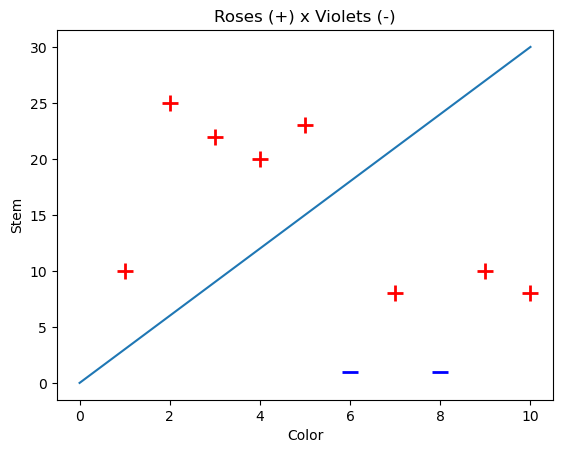

In [15]:
# Visualization - Plot the samples
for sample, d in zip(X_inputs,activated):
    # Plot the negative samples (Violets)
    if d > 0.5:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2, color = "blue")
    # Plot the positive samples (Roses)
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2, color = "red")

# Print a possible hyperplane, that is seperating the two classes
plt.xlabel('Color')
plt.ylabel('Stem')
plt.title('Roses (+) x Violets (-)')
plt.plot([0,10],[0,30])
plt.show()

## Summary

<p style='text-align: justify;'>
The artificial neuron imitates how a neuron in the brain works and consists of a single neuron. This notebook discusses the concept of a single-layer neural network using the artificial neuron algorithm and its use in classification problems. The notebook also explains how inputs, weights, and activation function work in an artificial neural network. Finally, the notebook presents a complete representation of the structure of a artificial neuron neural network.
</p>

## Clear the memory

Before moving on, please execute the following cell to clear up the CPU memory. This is required to move on to the next notebook.

In [16]:
#import IPython
#app = IPython.Application.instance()
#app.kernel.do_shutdown(True)

## Next

In the next section, you will learn how to apply a bias parameter in a artificial neuron using Intel® Python for data classification. In the next section, you will how a artificial neuron trained; after many guesses and adjustments, the weights will be correct in the notebook [_02-artificial-neuron-training.ipynb_](02-artificial-neuron-training.ipynb).